# Data Science Blog Post Project - AirBnB Seattle

### Table of content
- [Introduction](#introduction)
- [Preparing Data](#prepare)
    - [Gathering Data](#gather)
    - [Assessing Data](#assess)
    - [Cleaning Data](#clean)
- [Questions](#questions)
    - [What is the best time of the year to visit the city? How does the price of accommodation vary according to the time of year?](#question1)
    - [Where is the best neighborhood to stay? How much will I spend staying in a good neighborhood?](#question2)
    - [What most affects the daily price of an accommodation, the location, the characteristics of the property or the attention of the renter?](#question3)
        - [Data modeling](#modeling)
        - [Evaluate the results](#evaluate)
- [Conclusion](#conclusion)

# Introduction <a class="anchor" id="introduction"></a>

> Finding accommodation is a typical problem faced by travelers when planning a trip. And everyone want to stay in a well located and cozy accommodation, at a fair price. Therefore, this document will attempt to help you resolve this issue by answering the following questions about Seattle, USA:
- What is the best time of the year to visit the city? How does the price of accommodation vary according to the time of year?
- Where is the best neighborhood to stay? How much will I spend staying in a good neighborhood?
- What most affects the daily price of an accommodation, the location, the characteristics of the property or the attention of the renter?

# Preparing Data <a class="anchor" id="prepare"></a>

## Gathering Data <a class="anchor" id="gather"></a>
> For this project I used the data from AirBnB Seattle available on the [Kaggle website](https://www.kaggle.com/airbnb/seattle) and access the data programmatically using the [kaggle API](https://github.com/Kaggle/kaggle-api). More information about data and the API can be found by clicking on the links in this text.

In [1]:
import zipfile
from kaggle.api.kaggle_api_extended import KaggleApi
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split  # split
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score  # metrics
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 200)

%matplotlib inline

In [2]:
# Access the API and save the file in the seattle folder
# api = KaggleApi()
# api.authenticate()
# file1 = api.dataset_download_files('airbnb/seattle', 'seattle')

In [3]:
# Unzip the file and extract all the files to the seattle folder
# with zipfile.ZipFile('seattle/seattle.zip', 'r') as zip_ref:
#     zip_ref.extractall('seattle')

## Assessing Data <a class="anchor" id="assess"></a>
> Data is accessed visually and programmatically to find structural and quality issues.

In [4]:
seattle_calendar = pd.read_csv('seattle/calendar.csv')
seattle_listings = pd.read_csv('seattle/listings.csv')
seattle_reviews = pd.read_csv('seattle/reviews.csv')

In [5]:
seattle_calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [6]:
seattle_calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [7]:
seattle_calendar.duplicated().sum()

0

In [8]:
seattle_calendar.nunique()

listing_id    3818
date           365
available        2
price          669
dtype: int64

In [9]:
print("Number of NaN values:{}".format(
    seattle_calendar['price'].isnull().sum()))
print("Percentage of NaN values:{:2.0%}".format(
    seattle_calendar['price'].isnull().sum() / seattle_calendar.shape[0]))

Number of NaN values:459028
Percentage of NaN values:33%


**Data issues for seattle_calendar data set:**

- NaN values for price;
- Price type is not numeric;
- Date is set by day.

In [10]:
seattle_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

In [11]:
seattle_listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,"Make your self at home in this charming one-bedroom apartment, centrally-located on the west side of Queen Anne hill. This elegantly-decorated, completely private apartment (bottom unit of a dup...","Make your self at home in this charming one-bedroom apartment, centrally-located on the west side of Queen Anne hill. This elegantly-decorated, completely private apartment (bottom unit of a dup...",none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/cfe47d69_original.jpg?interpolation=lanczos-none&size=large_cover&output-format=jpg&output-quality=70,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a small landscape business. My life revolves around beauty wherever I find it or create it. I grew up in Seattle and love this city for the people, it's ...",within a few hours,96%,100%,f,"https://a0.muscache.com/ac/users/956883/profile_pic/1318103129/original.jpg?interpolation=lanczos-none&crop=w:w;*,*&crop=h:h;*,*&resize=50:*&output-format=jpg&output-quality=70","https://a0.muscache.com/ac/users/956883/profile_pic/1318103129/original.jpg?interpolation=lanczos-none&crop=w:w;*,*&crop=h:h;*,*&resize=225:*&output-format=jpg&output-quality=70",Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""Air Conditioning"",Kitchen,Heating,""Family/Kid Friendly"",Washer,Dryer}",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,"Chemically sensitive? We've removed the irritants triggering allergy or asthma attacks, like carpeting, forced air & used pillows, all culprits that harbor fungus, mold & bacteria. No smoking, no...","Beautiful, hypoallergenic apartment in an extremely safe, quiet and pedestrian-friendly section of Queen Anne. A leafy-green location that puts the best of Seattle at your doorstep. Free WiFi, fr...","Chemically sensitive? We've removed the irritants triggering allergy or asthma attacks, like carpeting, forced air & used pillows, all culprits that h

In [12]:
seattle_listings.duplicated().sum()

0

In [13]:
seattle_listings.nunique()

id                                  3818
listing_url                         3818
scrape_id                              1
last_scraped                           1
name                                3792
summary                             3478
space                               3119
description                         3742
experiences_offered                    1
neighborhood_overview               2506
notes                               1999
transit                             2574
thumbnail_url                       3498
medium_url                          3498
picture_url                         3818
xl_picture_url                      3498
host_id                             2751
host_url                            2751
host_name                           1466
host_since                          1380
host_location                        120
host_about                          2011
host_response_time                     4
host_response_rate                    45
host_acceptance_

In [14]:
print("Number of NaN values:{}".format(
    seattle_listings['price'].isnull().sum()))
print("Percentage of NaN values:{:2.0%}".format(
    seattle_listings['price'].isnull().sum() / seattle_calendar.shape[0]))

Number of NaN values:0
Percentage of NaN values:0%


In [15]:
seattle_listings.select_dtypes(include=['float64', 'int64']).columns

Index(['id', 'scrape_id', 'host_id', 'host_listings_count',
       'host_total_listings_count', 'latitude', 'longitude', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'square_feet', 'guests_included',
       'minimum_nights', 'maximum_nights', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'license', 'calculated_host_listings_count',
       'reviews_per_month'],
      dtype='object')

**Data issues for seattle_listings data set:**

- Many columns will not be used in this study;
- Price, host_response_rate, host_acceptance_rate type is not numeric;
- Nan values for property_type, host_response_rate, host_acceptance_rate, bathrooms, bedrooms, beds, host_response_rate, host_acceptance_rate, review_scores_rating, review_scores_accuracy, review_scores_cleanliness, review_scores_checkin, review_scores_communication, review_scores_location, review_scores_value.

In [16]:
seattle_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     84849 non-null  int64 
 1   id             84849 non-null  int64 
 2   date           84849 non-null  object
 3   reviewer_id    84849 non-null  int64 
 4   reviewer_name  84849 non-null  object
 5   comments       84831 non-null  object
dtypes: int64(3), object(3)
memory usage: 3.9+ MB


In [17]:
seattle_reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to everything!
1,7202016,39087409,2015-07-20,32440555,Frank,"Kelly has a great room in a very central location. \r\nBeautiful building , architecture and a style that we really like. \r\nWe felt guite at home here and wish we had spent more time.\r\nWent fo..."
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighborhood. This is the kind of apartment I wish I had!\r\n\r\nDidn't really get to meet Kelly until I was on my out, but she was always readily availabl..."
3,7202016,40813543,2015-08-02,33671805,George,"Close to Seattle Center and all it has to offer - ballet, theater, museum, Space Needle, restaurants of all ilk just blocks away, and the Metropolitan (probably the coolest grocer you'll ever find..."
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating in a great neighborhood. She has some great coffee and while I wasn't around much during my stay the time I spent interacting with her was very pleasa...


**The seattle_reviews data set will not be used in this study.**

## Cleaning Data <a class="anchor" id="clean"></a>
> A copy of the Dataframes will be made and all the issues described in the previous section will be resolved and the data will be prepared to answer all the questions.

In [18]:
seattle_calendar_final = seattle_calendar.copy()

seattle_calendar issue : NaN values for price.

solution: Drop NaN values for price.

In [19]:
seattle_calendar_final.dropna(subset=['price'], inplace=True)

seattle_calendar issue : Date is set by day.

solution: Create 2 columns, one for year and one for month, with the date value.

In [20]:
def get_month(row):
    ''' Get month from date '''
    return int(row['date'].split('-')[1])


def get_year(row):
    ''' Get year from date '''
    return int(row['date'].split('-')[0])

In [21]:
seattle_calendar_final['month'] = seattle_calendar_final.apply(
    get_month, axis=1)
seattle_calendar_final['year'] = seattle_calendar_final.apply(get_year, axis=1)

seattle_calendar issue : Price type is not numeric.

solution: Change price type to numeric.

In [22]:
seattle_calendar_final['price'] = pd.to_numeric(
    seattle_calendar_final['price'].str.replace(r"[$,]", ""))

In [23]:
seattle_calendar_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 934542 entries, 0 to 1393213
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   listing_id  934542 non-null  int64  
 1   date        934542 non-null  object 
 2   available   934542 non-null  object 
 3   price       934542 non-null  float64
 4   month       934542 non-null  int64  
 5   year        934542 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 49.9+ MB


In [24]:
seattle_calendar_final.head()

,listing_id,date,available,price,month,year
0,241032,2016-01-04,t,85.0,1,2016
1,241032,2016-01-05,t,85.0,1,2016
9,241032,2016-01-13,t,85.0,1,2016
10,241032,2016-01-14,t,85.0,1,2016
14,241032,2016-01-18,t,85.0,1,2016


In [25]:
seattle_listings_final = seattle_listings.copy()

seattle_listings issue : Many columns will not be used in this study.

solution: Drop columns that will not be used in this study.

In [26]:
columns = ['host_response_rate', 'host_acceptance_rate', 'neighbourhood_group_cleansed',
           'property_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price',
           'minimum_nights', 'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
           'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication',
           'review_scores_location', 'review_scores_value', 'cancellation_policy']
columns_drop = seattle_listings_final.columns[~seattle_listings_final.columns.isin(
    columns)].values
columns_drop

array(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name',
       'summary', 'space', 'description', 'experiences_offered',
       'neighborhood_overview', 'notes', 'transit', 'thumbnail_url',
       'medium_url', 'picture_url', 'xl_picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic',
       'host_identity_verified', 'street', 'neighbourhood',
       'neighbourhood_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude',
       'longitude', 'is_location_exact', 'room_type', 'bed_type',
       'amenities', 'square_feet', 'weekly_price', 'monthly_price',
       'security_deposit', 'cleaning_fee', 'guests_included',
       'extra_people', 'maximum_nig

In [27]:
seattle_listings_final.drop(columns=columns_drop, inplace=True)

seattle_listings issue : Price, host_response_rate, host_acceptance_rate type is not numeric;

solution: Change price, host_response_rate and host_acceptance_rate type to numeric.

In [28]:
seattle_listings_final['price'] = pd.to_numeric(
    seattle_listings_final['price'].str.replace(r"[$,]", ""))

In [29]:
seattle_listings_final['host_response_rate'] = pd.to_numeric(
    seattle_listings_final['host_response_rate'].str.replace(r"[%]", ""))
seattle_listings_final['host_acceptance_rate'] = pd.to_numeric(
    seattle_listings_final['host_acceptance_rate'].str.replace(r"[%]", ""))

seattle_listings issue : Nan values for property_type, bathrooms, bedrooms, beds, host_response_rate, host_acceptance_rate, review_scores_rating, review_scores_accuracy, review_scores_cleanliness, review_scores_checkin, review_scores_communication, review_scores_location, review_scores_value.

solution:

- Fill NaN values with 'Other' for property_type.
- Fill NaN values with the mode for bathrooms, bedrooms, beds.
- Fill NaN values with the mean for host_response_rate, host_acceptance_rate, review_scores_rating, review_scores_accuracy, review_scores_cleanliness, review_scores_checkin, review_scores_communication, review_scores_location, review_scores_value.

In [30]:
seattle_listings_final.property_type.value_counts()

House              1733
Apartment          1708
Townhouse           118
Condominium          91
Loft                 40
Bed & Breakfast      37
Other                22
Cabin                21
Bungalow             13
Camper/RV            13
Boat                  8
Tent                  5
Treehouse             3
Chalet                2
Dorm                  2
Yurt                  1
Name: property_type, dtype: int64

In [31]:
seattle_listings_final.property_type.fillna('Other', inplace=True)

In [32]:
def fill_mode(df, features):
    ''' Fill the NaN values with the column mode '''
    for feature in features:
        df[feature].fillna(df[feature].mode()[0], inplace=True)


fill_mode(seattle_listings_final, ['bathrooms', 'bedrooms', 'beds'])

In [33]:
def fill_mean(df, features):
    ''' Fill the NaN values with the column mean '''
    for feature in features:
        df[feature].fillna(df[feature].mean(), inplace=True)


fill_mean(seattle_listings_final, ['host_response_rate', 'host_acceptance_rate', 'review_scores_rating',
                                   'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin',
                                   'review_scores_communication', 'review_scores_location', 'review_scores_value'])

In [34]:
seattle_listings_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   host_response_rate            3818 non-null   float64
 1   host_acceptance_rate          3818 non-null   float64
 2   neighbourhood_group_cleansed  3818 non-null   object 
 3   property_type                 3818 non-null   object 
 4   accommodates                  3818 non-null   int64  
 5   bathrooms                     3818 non-null   float64
 6   bedrooms                      3818 non-null   float64
 7   beds                          3818 non-null   float64
 8   price                         3818 non-null   float64
 9   minimum_nights                3818 non-null   int64  
 10  number_of_reviews             3818 non-null   int64  
 11  review_scores_rating          3818 non-null   float64
 12  review_scores_accuracy        3818 non-null   float64
 13  rev

In [35]:
seattle_listings_final.head()

,host_response_rate,host_acceptance_rate,neighbourhood_group_cleansed,property_type,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,cancellation_policy
0,96.000000,100.000000,Queen Anne,Apartment,4,1.0,1.0,1.0,85.0,1,207,95.000000,10.000000,10.000000,10.000000,10.000000,9.000000,10.000000,moderate
1,98.000000,100.000000,Queen Anne,Apartment,4,1.0,1.0,1.0,150.0,2,43,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,strict
2,67.000000,100.000000,Queen Anne,House,11,4.5,5.0,7.0,975.0,4,20,97.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,strict
3,94.886798,99.967159,Queen Anne,Apartment,3,1.0,0.0,2.0,100.0,1,0,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,flexible
4,100.000000,99.967159,Queen Anne,House,6,2.0,3.0,3.0,450.0,1,38,92.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,strict


# Questions <a class="anchor" id="questions"></a>

## What is the best time of the year to visit the city? How does the price of accommodation vary according to the time of year? <a class="anchor" id="question1"></a>

In [36]:
# Create a DataFrame to count available accommodations by time of year
df_frequency = seattle_calendar_final.groupby(
    by=['year'])['month'].value_counts().reset_index(name='count')

In [37]:
df_frequency['period'] = df_frequency["year"].astype(
    str) + '_' + df_frequency["month"].astype(str).str.zfill(2)

In [38]:
# Create a DataFrame with the average price by time of the year
df_avg_price = seattle_calendar_final.groupby(
    by=['year', 'month'])['price'].mean().reset_index(name='avg_price')

In [39]:
df_avg_price['period'] = df_avg_price["year"].astype(
    str) + '_' + df_avg_price["month"].astype(str).str.zfill(2)

In [40]:
# Merge the both DataFrames and drop columns of month and year
df_question1 = df_frequency.merge(df_avg_price, on='period')
df_question1.drop(columns=['year_x', 'month_x',
                           'year_y', 'month_y'], inplace=True)

In [41]:
# Create a DataFrame without the data for the year of 2017 because it seems that there isn´t enough data compared to 2016
df_question1 = df_question1[df_question1['period']
                            != '2017_01'].sort_values('period')
df_question1

,count,period,avg_price
11,59239,2016_01,121.568409
10,73321,2016_02,124.293927
1,83938,2016_03,128.644488
8,76037,2016_04,135.097005
4,79971,2016_05,139.538183
6,77244,2016_06,147.473137
9,74222,2016_07,152.094150
7,76347,2016_08,150.656594
5,77246,2016_09,143.255949
2,82438,2016_10,137.031939


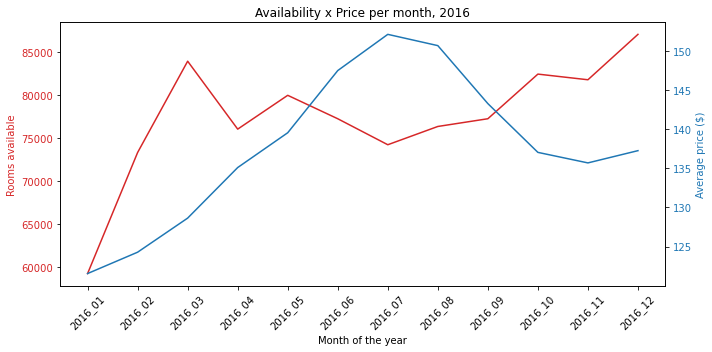

In [42]:
fig, ax1 = plt.subplots(figsize=[10, 5])

plt.xticks(rotation=45)
plt.title('Availability x Price per month, 2016')

color = 'tab:red'
ax1.set_xlabel('Month of the year')
ax1.set_ylabel('Rooms available', color=color)
ax1.plot(df_question1['period'], df_question1['count'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
# we already handled the x-label with ax1
ax2.set_ylabel('Average price ($)', color=color)
ax2.plot(df_question1['period'], df_question1['avg_price'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.savefig('availability_price.png') # save the chart as a png image

plt.show()

>

## Where is the best neighborhood to stay? How much will I spend staying in a good neighborhood? <a class="anchor" id="question2"></a>

In [43]:
# Create a DataFrame with the average localization scores by neighborhood
df_question2_location = seattle_listings_final[[
    'neighbourhood_group_cleansed', 'review_scores_location']]
df_question2_location = df_question2_location.groupby('neighbourhood_group_cleansed')[
    'review_scores_location'].mean().reset_index().sort_values('review_scores_location', ascending=False)
df_question2_location

,neighbourhood_group_cleansed,review_scores_location
2,Capitol Hill,9.782651
6,Downtown,9.747283
0,Ballard,9.741434
16,West Seattle,9.733820
12,Queen Anne,9.726935
11,Other neighborhoods,9.632336
9,Magnolia,9.615161
3,Cascade,9.579932
4,Central Area,9.505273
10,Northgate,9.401672


In [44]:
# Create a DataFrame with the average prices by neighborhood
df_question2_price = seattle_listings_final[[
    'neighbourhood_group_cleansed', 'price']]
df_question2_price = df_question2_price.groupby('neighbourhood_group_cleansed')[
    'price'].mean().reset_index().sort_values('price', ascending=False)
df_question2_price

,neighbourhood_group_cleansed,price
9,Magnolia,177.672131
12,Queen Anne,157.223729
6,Downtown,154.405660
16,West Seattle,141.359606
3,Cascade,140.101124
2,Capitol Hill,130.592593
4,Central Area,128.338753
0,Ballard,124.682609
11,Other neighborhoods,119.968514
7,Interbay,109.727273


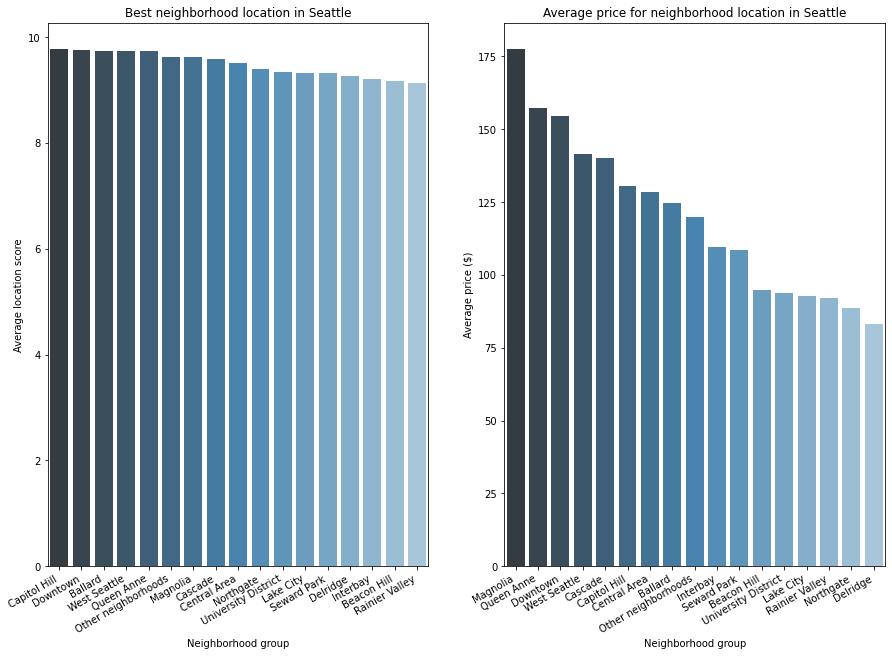

In [45]:
fig = plt.figure(figsize=[15, 10])

# Chart of location scores
plt.subplot(1, 2, 1)
ax = sb.barplot("neighbourhood_group_cleansed",
                y="review_scores_location", data=df_question2_location, palette="Blues_d")
plt.title('Best neighborhood location in Seattle')
plt.ylabel('Average location score')
plt.xlabel('Neighborhood group')
plt.xticks(rotation=30, horizontalalignment='right')

# Chart of prices
plt.subplot(1, 2, 2)
ax = sb.barplot("neighbourhood_group_cleansed",
                y="price", data=df_question2_price, palette="Blues_d")
plt.title('Average price for neighborhood location in Seattle')
plt.ylabel('Average price ($)')
plt.xlabel('Neighborhood group')
plt.xticks(rotation=30, horizontalalignment='right')

plt.savefig('location_price.png') # save the chart as a png image

plt.show()

>

## What most affects the daily price of an accommodation, the location, the characteristics of the property or the attention of the renter? <a class="anchor" id="question3"></a>

### Data modeling <a class="anchor" id="modeling"></a>
>

In [46]:
df_question3 = seattle_listings_final.copy()

In [47]:
numeric_vars = df_question3.select_dtypes(
    include=['float64', 'int64']).columns.values

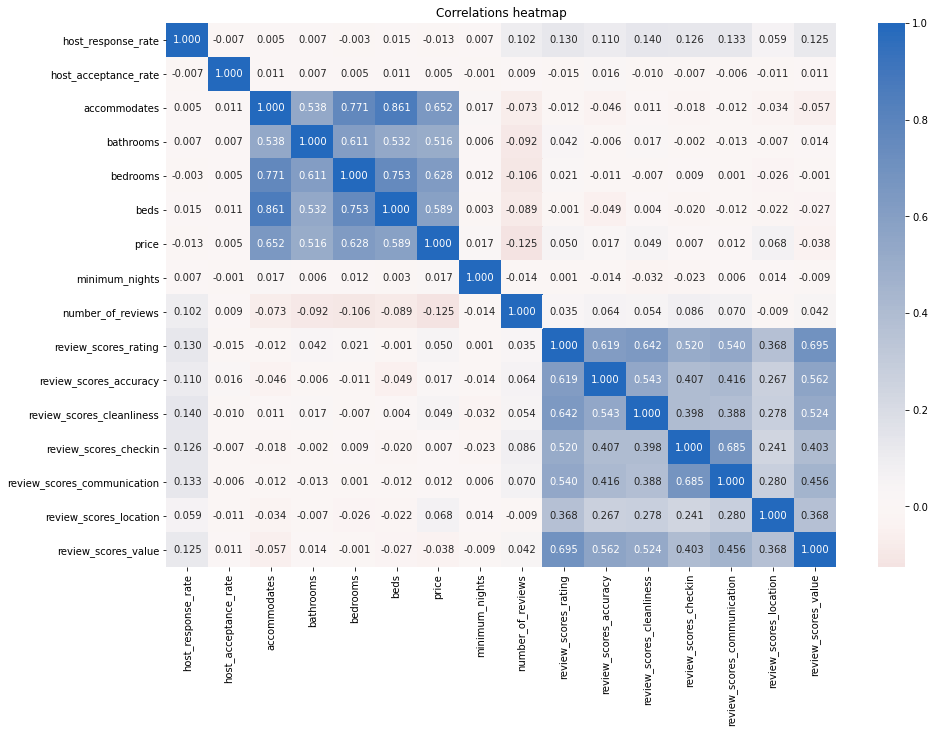

In [48]:
plt.figure(figsize=[15, 10])
sb.heatmap(df_question3[numeric_vars].corr(), annot=True, fmt='.3f',
           cmap='vlag_r', center=0).set_title('Correlations heatmap')
plt.show()

In [49]:
columns_drop = ['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
                'review_scores_checkin', 'review_scores_communication', 'review_scores_location']

df_question3.drop(columns=columns_drop, inplace=True)

In [50]:
cat_vars = df_question3.select_dtypes(
    include=['object']).columns.values

for col in cat_vars:
    df_question3 = pd.concat([df_question3.drop(col, axis=1), pd.get_dummies(
        df_question3[col], prefix=col, prefix_sep='_', drop_first=True)], axis=1)

In [51]:
TEST_SIZE = 0.3
RAND_STATE = 42

X = df_question3.drop(columns='price')
y = df_question3[['price']]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=TEST_SIZE, random_state=RAND_STATE)

forest = RandomForestRegressor(random_state=RAND_STATE, n_jobs=-1)

forest.fit(X_train, y_train.values.ravel())

RandomForestRegressor(n_jobs=-1, random_state=42)

### Evaluate the results <a class="anchor" id="evaluate"></a>
>

In [52]:
# calculate scores for the model
y_train_preds = forest.predict(X_train)
y_test_preds = forest.predict(X_test)

print('Random Forest MSE train: %.3f, test: %.3f' % (
    mean_squared_error(y_train, y_train_preds),
    mean_squared_error(y_test, y_test_preds)))
print('Random Forest R^2 train: %.3f, test: %.3f' % (
    r2_score(y_train, y_train_preds),
    r2_score(y_test, y_test_preds)))

Random Forest MSE train: 544.074, test: 3748.219
Random Forest R^2 train: 0.932, test: 0.562


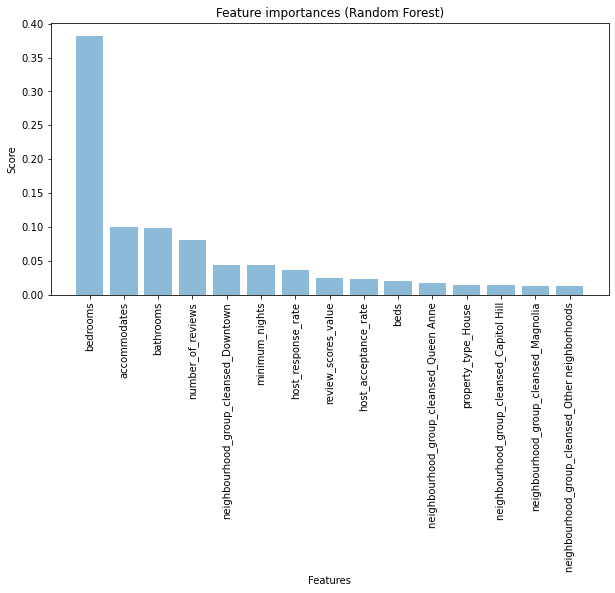

In [53]:
headers = ["name", "score"]
values = zip(X_train.columns, forest.feature_importances_)
forest_features = pd.DataFrame(values, columns=headers)
forest_features = forest_features.sort_values(
    by=['score'], ascending=False)

features = forest_features['name'][:15]
y_pos = np.arange(len(features))
scores = forest_features['score'][:15]

# plot feature importances
plt.figure(figsize=(10, 5))
plt.bar(y_pos, scores, align='center', alpha=0.5)
plt.xticks(y_pos, features, rotation=90)
plt.ylabel('Score')
plt.xlabel('Features')
plt.title('Feature importances (Random Forest)')

plt.savefig('feature_importances.png')

plt.show()

>

# Conclusion <a class="anchor" id="conclusion"></a>
> 